In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from function import barplot_annotate_brackets
import warnings
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Supplementary Figure9', exist_ok=True)

# Load raw data

In [3]:
# provirus annotaiton
Dfam_RM = pd.read_csv('../data/TE/provirus_annotation.csv')
Dfam_RM.index = Dfam_RM['repeat name']
Dfam_RM

,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,5-LTR chr,5-LTR start,5-LTR end,5-LTR name,3-LTR chr,3-LTR start,3-LTR end,3-LTR name,repeat best cluster name,repeat adjusted cluster name
repeat name,,,,,,,,,,,,,,,,,,,,,
LTR2B_Harlequin_chr1_dup1,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,chr1,1418378.0,1418852.0,LTR2B_chr1_dup2,chr1,1412252.0,1412721.0,LTR2B_chr1_dup1,LTR2_Harlequin_0,LTR2_Harlequin_0
THE1C_THE1-int_chr1_dup1,chr1,2954590,2956910,THE1C_THE1-int_chr1_dup1,THE1_THE1-int_1_dup1,2100/8798/2253,-,THE1_THE1-int,THE1C_THE1-int,THE1_THE1-int_1,...,chr1,2956536.0,2956910.0,THE1C_chr1_dup4,chr1,2954590.0,2954963.0,THE1C_chr1_dup3,THE1_THE1-int_1,THE1_THE1-int_1
MSTB_MST-int_chr1_dup1,chr1,3006305,3008814,MSTB_MST-int_chr1_dup1,MST_MST-int_0_dup1,2342/9052/2311,+,MST_MST-int,MSTB_MST-int,MST_MST-int_0,...,chr1,3006305.0,3006735.0,MSTB_chr1_dup8,chr1,3008393.0,3008814.0,MSTB_chr1_dup9,MST_MST-int_1,MST_MST-int_0
LTR66_HERVL66_chr1_dup1,chr1,4587568,4591911,LTR66_HERVL66_chr1_dup1,nan_dup1,4002/973/3928/4575/2847/1557/6552/4132,-,LTR66_HERVL66,LTR66_HERVL66,NaN,...,chr1,4591335.0,4591911.0,LTR66_chr1_dup2,chr1,4587568.0,4588184.0,LTR66_chr1_dup1,NaN,NaN
THE1B_THE1-int_chr1_dup1,chr1,4857446,4859749,THE1B_THE1-int_chr1_dup1,THE1_THE1-int_1_dup2,2707/10328/2309,+,THE1_THE1-int,THE1B_THE1-int,THE1_THE1-int_1,...,chr1,4857446.0,4857808.0,THE1B_chr1_dup15,chr1,4859391.0,4859749.0,THE1B_chr1_dup16,THE1_THE1-int_1,THE1_THE1-int_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTR5B_HERVK_chrX_dup1,chrX,154608423,154615762,LTR5B_HERVK_chrX_dup1,LTR5_HERVK_0_dup15,7405/32575/4738/7532,-,LTR5_HERVK,LTR5B_HERVK,LTR5_HERVK_0,...,chrX,154614775.0,154615762.0,LTR5B_chrX_dup15,chrX,154608423.0,154609415.0,LTR5B_chrX_dup14,LTR5_HERVK_0,LTR5_HERVK_0
THE1B_THE1D-int_chrX_dup18,chrX,155450858,155453130,THE1B_THE1D-int_chrX_dup18,THE1_THE1-int_1_dup1700,2242/10227/1944,+,THE1_THE1-int,THE1B_THE1D-int,THE1_THE1-int_1,...,chrX,155450858.0,155451214.0,THE1B_chrX_dup1049,chrX,155452798.0,155453130.0,THE1B_chrX_dup1050,THE1_THE1-int_1,THE1_THE1-int_1
THE1D_THE1D-int_chrX_dup45,chrX,155561132,155563506,THE1D_THE1D-int_chrX_dup45,THE1_THE1-int_1_dup1701,1823/10926/1765,-,THE1_THE1-int,THE1D_THE1D-int,THE1_THE1-int_1,...,chrX,155563139.0,155563506.0,THE1D_chrX_dup876,chrX,155561132.0,155561484.0,THE1D_chrX_dup875,THE1_THE1-int_1,THE1_THE1-int_1


In [4]:
columns = ['repeat chr', 'repeat start', 'repeat end', 'repeat name', 'repeat score', 'repeat strand','repeat subfamily name', 'repeat family name', 
           'LTR subfamily name', 'LTR family name', 'Int subfamily name', 'Int family name', 
           'repeat class', 'repeat classification', 'repeat length', 'repeat substitution', 'repeat deletion', 'repeat insertion', 
           'Int chr', 'Int start', 'Int end', 'Int name', '', '', '5-LTR chr', '5-LTR start', '5-LTR end', '5-LTR name', '3-LTR chr', '3-LTR start', '3-LTR end', '3-LTR name']

TRIM28_columns = ['TRIM28 summits chr', 'TRIM28 summits start', 'TRIM28 summits end', 'TRIM28 peak name', 'TRIM28 score', 'TRIM28 strand', 'TRIM28 signal value',
                  'TRIM28 p value', 'TRIM28 q value', 'TRIM28 peak chr', 'TRIM28 peak start', 'TRIM28 peak end', 'TRIM28 peak length', 'TRIM28 accession',
                  'TRIM28 experiment', 'TRIM28 assay', 'TRIM28 run type', 'TRIM28 Cell type', 'TRIM28 Cell type class', 'TRIM28 control']

In [5]:
# TRIM28 metadata
TRIM28_metadata = pd.read_csv('../data/ChIP-seq/TRIM28_ChIP-seq_metadata.csv')
display(TRIM28_metadata.head())

# TRIM28 overlap
Dfam_RM_overlap_TRIM28 = pd.read_table('../data/overlap/provirus_TRIM28_overlap.bed', header=None)
Dfam_RM_overlap_TRIM28.columns = Dfam_RM.columns.tolist() + TRIM28_columns + ['overlap length']

print(Dfam_RM_overlap_TRIM28.shape)
Dfam_RM_overlap_TRIM28.head()

,TRIM28 accession,TRIM28 experiment,TRIM28 assay,TRIM28 run type,TRIM28 Cell type,TRIM28 Cell type class,TRIM28 control,Number of raw peak,Number of filtering peak,median of score,median of signal value,median of peak length
0,ENCSR000BRW_replicate2,ENCSR000BRW,TF ChIP-seq,single-ended,K562,Blood,True,17970,13277,92.0,6.61805,194.0
1,ENCSR000BRW_replicate1,ENCSR000BRW,TF ChIP-seq,single-ended,K562,Blood,True,26818,20020,102.0,5.66728,226.0
2,ENCSR000EUZ_replicate2,ENCSR000EUZ,TF ChIP-seq,single-ended,HEK293,Kidney,True,30986,18423,78.0,4.90666,459.0
3,ENCSR000EUZ_replicate1,ENCSR000EUZ,TF ChIP-seq,single-ended,HEK293,Kidney,True,19909,13835,81.0,5.18326,402.0
4,ENCSR474CVP_replicate1,ENCSR474CVP,TF ChIP-seq,paired-ended,K562,Blood,True,23854,13428,89.0,5.26054,407.0


(21610, 56)


,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,TRIM28 peak end,TRIM28 peak length,TRIM28 accession,TRIM28 experiment,TRIM28 assay,TRIM28 run type,TRIM28 Cell type,TRIM28 Cell type class,TRIM28 control,overlap length
0,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,1412789,212,ENCSR000BRW_replicate2,ENCSR000BRW,TF ChIP-seq,single-ended,K562,Blood,True,1
1,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,1412812,209,ENCSR000BRW_replicate1,ENCSR000BRW,TF ChIP-seq,single-ended,K562,Blood,True,1
2,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,1412945,569,ENCSR474CVP_replicate1,ENCSR474CVP,TF ChIP-seq,paired-ended,K562,Blood,True,1
3,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,1412982,591,ENCSR474CVP_replicate3,ENCSR474CVP,TF ChIP-seq,paired-ended,K562,Blood,True,1
4,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,1412892,565,ENCSR000EVY_replicate1,ENCSR000EVY,TF ChIP-seq,single-ended,K562,Blood,True,1


In [6]:
# load TE targets
KZFP_target = pd.read_csv('../data/targets/provirus_targets_for_analysis.csv')
display(KZFP_target.head())

,KZFP gene symbol,repeat adjusted subfamily name,target region,ratio,p value,q value,log10 q value,normalized score,rank,overlap peak count to all copies,...,binding rate,repeat family name,repeat class,repeat classification,emergence era of TE subfamily,evolutionary age of TE subfamily,evolutionary age of KZFP for analysis,emergence era of KZFP for analysis,evolutionary age of KZFP in Imbeault et al.,evolutionary age of KZFP in Tribolet-Hardy et al.
0,ZSCAN29,MER9_HERVK9_1,3-LTR,42.981357,3.614508e-16,5.530197e-14,13.257259,1.000000,Primary,12,...,0.038095,MER9_HERVK9,ERV/LTR,ERVK,Catarrhini,29.4,179.2,NaN,179.2,NaN
1,ZNF90,LTR7_HERVH_0,Int,30.895326,3.275148e-37,3.912930e-35,34.407498,1.000000,Primary,33,...,0.284483,LTR7_HERVH,ERV/LTR,ERV1,Homininae,9.1,9.1,Homininae,15.8,9.1
2,ZNF90,LTR7_HERVH_2,Int,39.283853,5.114941e-37,3.912930e-35,34.407498,1.000000,Primary,30,...,0.352941,LTR7_HERVH,ERV/LTR,ERV1,Hominoidea,20.2,9.1,Homininae,15.8,9.1
3,ZNF90,LTR7_HERVH_1,Int,27.727265,1.034371e-35,5.275295e-34,33.277753,0.967166,Primary,33,...,0.261905,LTR7_HERVH,ERV/LTR,ERV1,Hominoidea,20.2,9.1,Homininae,15.8,9.1
4,ZNF90,LTR7_HERVH_3,Int,52.484490,7.016319e-16,2.683742e-14,13.571259,0.394427,Secondary,11,...,0.500000,LTR7_HERVH,ERV/LTR,ERV1,Hominidae,15.8,9.1,Homininae,15.8,9.1


# Process raw data

In [7]:
# filtering
Dfam_RM_fil = Dfam_RM[(Dfam_RM['5-LTR name'].isna()==False) & (Dfam_RM['3-LTR name'].isna()==False) & (Dfam_RM['repeat adjusted subfamily name'].isna()==False)]
print(len(Dfam_RM), len(Dfam_RM_fil))

Dfam_RM_overlap_TRIM28_fil = Dfam_RM_overlap_TRIM28[Dfam_RM_overlap_TRIM28['repeat name'].isin(Dfam_RM_fil['repeat name'])].copy()
print(len(Dfam_RM_overlap_TRIM28), len(Dfam_RM_overlap_TRIM28_fil))

5518 5294
21610 20843


In [8]:
# add repeat subfamily name
Dfam_RM_fil_dict = Dfam_RM_fil.to_dict()
Dfam_RM_overlap_TRIM28_fil['repeat adjusted subfamily name'] = Dfam_RM_overlap_TRIM28_fil['repeat name'].apply(lambda x:Dfam_RM_fil_dict['repeat adjusted subfamily name'][x])

In [9]:
# add summit position in repeat 
def return_position_in_repeat(summit, r_s, r_e, strand):

    if strand == '+':

        return summit - r_s
    
    else:

        return r_e - summit


# TRIM28
position_in_repeat_list = list()
for summit, r_s, r_e, strand in Dfam_RM_overlap_TRIM28_fil[['TRIM28 summits start', 'repeat start', 'repeat end', 'repeat strand']].values:

    position = return_position_in_repeat(summit, r_s, r_e, strand)
    position_in_repeat_list.append(position)

Dfam_RM_overlap_TRIM28_fil['summit start in repeat'] = position_in_repeat_list


In [10]:
# ポジションがLTRかIntかを判定する

# repeat内でのピークの頂点の位置を追加する
def return_region_in_repeat(summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand):
            
    if LTR5_s <= summit and summit <= LTR5_e :
                
        return '5-LTR'
            
    elif LTR3_s <= summit and summit <= LTR3_e:

        return '3-LTR'

    else:

        if (LTR5_e <= summit and summit <= LTR3_s) or (LTR3_e <= summit and summit <= LTR5_s):

            return 'Int'

        else:

            print(summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand)



# TRIM28
position_in_repeat_list = list()
for summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand in Dfam_RM_overlap_TRIM28_fil[['TRIM28 summits start', '5-LTR start', '5-LTR end', '3-LTR start', '3-LTR end', 'repeat strand']].values:

    position = return_region_in_repeat(summit, LTR5_s, LTR5_e, LTR3_s, LTR3_e, strand)
    position_in_repeat_list.append(position)

Dfam_RM_overlap_TRIM28_fil['summit region in repeat'] = position_in_repeat_list

# Supplementary Fig.9A

In [11]:
Int = KZFP_target[(KZFP_target['target region']=='Int')]
Int = Int[Int[['repeat adjusted subfamily name', 'KZFP gene symbol']].duplicated()==False]
LTR = KZFP_target[(KZFP_target['target region'].isin(['5-LTR', '3-LTR']))]
LTR = LTR[LTR[['repeat adjusted subfamily name', 'KZFP gene symbol']].duplicated()==False]

print(len(LTR), len(Int))

48 82


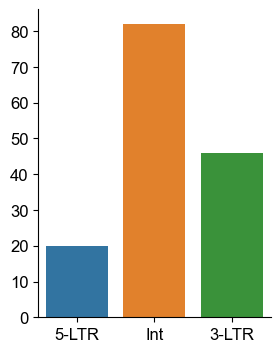

In [12]:
# Which region do KRAB-ZFPs target？
fig = plt.figure(figsize=[3, 4])
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

KZFP_target_nodup = KZFP_target[KZFP_target[['repeat adjusted subfamily name', 'KZFP gene symbol', 'target region']].duplicated()==False]
data = KZFP_target_nodup['target region'].value_counts()

x = data.index
y = data.values
order = ['5-LTR', 'Int', '3-LTR']

sns.barplot(x=x, y=y, order=order, palette=['tab:blue', 'tab:orange', 'tab:green'])

#plt.xlabel('region')
#plt.ylabel('KRAB-ZFP target')
plt.xlabel('')
plt.ylabel('')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Supplementary Figure9/Supplementary Figure9A.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure9/Supplementary Figure9A.pdf', bbox_inches='tight', transparent=True, dpi=300)


# Supplementary Fig.9B

In [13]:
# 5LTR, 3LTR, Intで数える

for region in ['5-LTR', '3-LTR', 'Int']:

    df = Dfam_RM_overlap_TRIM28_fil[Dfam_RM_overlap_TRIM28_fil['summit region in repeat']==region]
    print(len(df))

2514
2464
15865


In [14]:
# obtain binding rate

#regionごとに
dataset = Dfam_RM_fil.copy()
for region in ['5-LTR', '3-LTR', 'Int']:

    TRIM28 = Dfam_RM_overlap_TRIM28_fil[Dfam_RM_overlap_TRIM28_fil['summit region in repeat']==region]
    count = TRIM28['repeat name'].value_counts()
    dataset = pd.concat([dataset, count.rename(region)], axis=1)
    dataset[region] = dataset[region].fillna(0)

dataset

,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,5-LTR name,3-LTR chr,3-LTR start,3-LTR end,3-LTR name,repeat best cluster name,repeat adjusted cluster name,5-LTR,3-LTR,Int
repeat name,,,,,,,,,,,,,,,,,,,,,
LTR2B_Harlequin_chr1_dup1,chr1,1412252,1418852,LTR2B_Harlequin_chr1_dup1,LTR2_Harlequin_0_dup1,3374/21254/3415/2380/6030/3511,-,LTR2_Harlequin,LTR2B_Harlequin,LTR2_Harlequin_0,...,LTR2B_chr1_dup2,chr1,1412252.0,1412721.0,LTR2B_chr1_dup1,LTR2_Harlequin_0,LTR2_Harlequin_0,0.0,9.0,0.0
THE1C_THE1-int_chr1_dup1,chr1,2954590,2956910,THE1C_THE1-int_chr1_dup1,THE1_THE1-int_1_dup1,2100/8798/2253,-,THE1_THE1-int,THE1C_THE1-int,THE1_THE1-int_1,...,THE1C_chr1_dup4,chr1,2954590.0,2954963.0,THE1C_chr1_dup3,THE1_THE1-int_1,THE1_THE1-int_1,1.0,0.0,3.0
MSTB_MST-int_chr1_dup1,chr1,3006305,3008814,MSTB_MST-int_chr1_dup1,MST_MST-int_0_dup1,2342/9052/2311,+,MST_MST-int,MSTB_MST-int,MST_MST-int_0,...,MSTB_chr1_dup8,chr1,3008393.0,3008814.0,MSTB_chr1_dup9,MST_MST-int_1,MST_MST-int_0,0.0,0.0,6.0
THE1B_THE1-int_chr1_dup1,chr1,4857446,4859749,THE1B_THE1-int_chr1_dup1,THE1_THE1-int_1_dup2,2707/10328/2309,+,THE1_THE1-int,THE1B_THE1-int,THE1_THE1-int_1,...,THE1B_chr1_dup15,chr1,4859391.0,4859749.0,THE1B_chr1_dup16,THE1_THE1-int_1,THE1_THE1-int_1,0.0,0.0,2.0
THE1B_THE1-int_chr1_dup2,chr1,4900874,4903166,THE1B_THE1-int_chr1_dup2,THE1_THE1-int_0_dup1,2228/11949/2187,-,THE1_THE1-int,THE1B_THE1-int,THE1_THE1-int_0,...,THE1B_chr1_dup19,chr1,4900874.0,4901239.0,THE1B_chr1_dup18,THE1_THE1-int_0,THE1_THE1-int_0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTR5B_HERVK_chrX_dup1,chrX,154608423,154615762,LTR5B_HERVK_chrX_dup1,LTR5_HERVK_0_dup15,7405/32575/4738/7532,-,LTR5_HERVK,LTR5B_HERVK,LTR5_HERVK_0,...,LTR5B_chrX_dup15,chrX,154608423.0,154609415.0,LTR5B_chrX_dup14,LTR5_HERVK_0,LTR5_HERVK_0,4.0,0.0,11.0
THE1B_THE1D-int_chrX_dup18,chrX,155450858,155453130,THE1B_THE1D-int_chrX_dup18,THE1_THE1-int_1_dup1700,2242/10227/1944,+,THE1_THE1-int,THE1B_THE1D-int,THE1_THE1-int_1,...,THE1B_chrX_dup1049,chrX,155452798.0,155453130.0,THE1B_chrX_dup1050,THE1_THE1-int_1,THE1_THE1-int_1,1.0,0.0,0.0
THE1D_THE1D-int_chrX_dup45,chrX,155561132,155563506,THE1D_THE1D-int_chrX_dup45,THE1_THE1-int_1_dup1701,1823/10926/1765,-,THE1_THE1-int,THE1D_THE1D-int,THE1_THE1-int_1,...,THE1D_chrX_dup876,chrX,155561132.0,155561484.0,THE1D_chrX_dup875,THE1_THE1-int_1,THE1_THE1-int_1,1.0,0.0,0.0


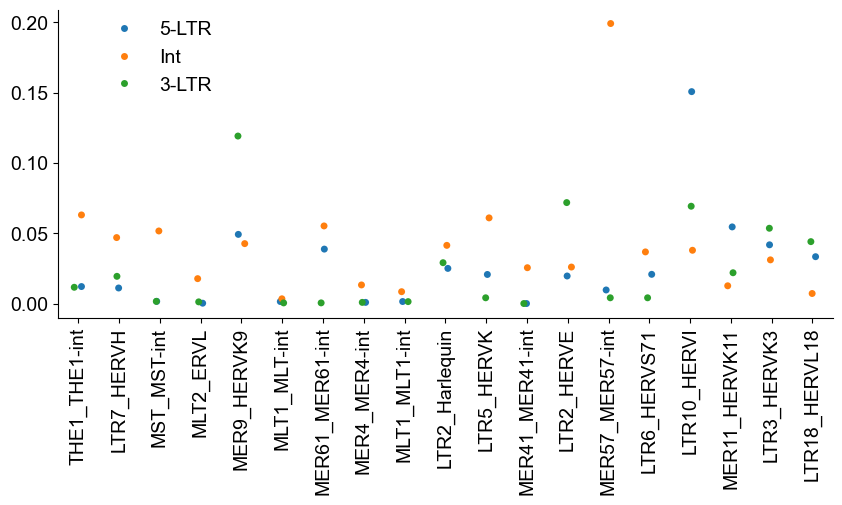

In [15]:
fig = plt.figure(figsize=[10, 4])
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

order = ['5-LTR', 'Int', '3-LTR']
groupby = dataset[['repeat adjusted subfamily name', 'repeat family name'] + order].groupby(by=['repeat family name', 'repeat adjusted subfamily name'])
groupby_mean = groupby.mean()

groupby_family = groupby_mean.groupby(by='repeat family name')
data = groupby_family.max() - groupby_family.min()
melt = data.reset_index()[['repeat family name'] + order].melt(id_vars='repeat family name')

x = melt['repeat family name']
y = melt['value'] / 35
hue = melt['variable']
order = Dfam_RM_fil['repeat family name'].value_counts().index

sns.stripplot(x=x, y=y, hue=hue, order=order)

#plt.ylim(-0.1, 1)
#plt.ylabel('binding rate (Max-Min)')
#plt.xlabel('family')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=90)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc=[0.05, 0.7], frameon=False)

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Supplementary Figure9/Supplementary Figure9B.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure9/Supplementary Figure9B.pdf', bbox_inches='tight', transparent=True, dpi=300)
